## Question 1

### Convert text file to Adjacency Matrix and Edge List

In [30]:
f = open("US_AIR_DATA.txt")

In [2]:
list_ =  f.readlines()

In [3]:
u = []
v = []

for i in list_:
    getArray = i.split("\t")
    
    getU = getArray[0]
    getV = getArray[1][:-1]
    
    u.append(int(getU)-1)
    v.append(int(getV)-1)

In [4]:
nodes = max(max(u),max(v)) + 1

print('The total number of Nodes are : ',nodes)
print('The Number of edges are : ',len(u))

# AdjacencyMatrix is created.
m = nodes
n = nodes
adjacencyMatrix = [[0 for x in range(m)] for y in range(n) ]

for i in range(len(u)):
    adjacencyMatrix[u[i]][v[i]] = 1
    adjacencyMatrix[v[i]][u[i]] = 1


The total number of Nodes are :  332
The Number of edges are :  2126


In [5]:
count = 0
for i in range(m):
    for j in range(n):
        if adjacencyMatrix[i][j] == 1:
            count = count + 1
            
print('Number of 1''s present are : ',count)

Number of 1s present are :  4252


In [6]:
#Creating an Edge List
#Edge List is created as an Dictionary where key is the Node and Value is a list consists of all the neighbours nodes 

edgeList = {}

for i in range(nodes):
    getList = []
    # j is for Columns
    for j in range(nodes):
        if adjacencyMatrix[i][j] == 1 :
            getList.append(j)
    edgeList[i] = getList

print('Edge List of the given data is : \n',edgeList)

Edge List of the given data is : 
 {0: [1, 3, 7], 1: [0, 3, 7], 2: [4, 7], 3: [0, 1, 7, 25, 46], 4: [2, 7], 5: [6, 7, 12], 6: [5, 7, 12], 7: [0, 1, 2, 3, 4, 5, 6, 12, 15, 22, 23, 25, 26, 27, 29, 33, 34, 35, 36, 37, 46, 64, 66, 111, 117, 143, 200, 247, 312], 8: [9, 10, 11, 12], 9: [8, 10, 11, 12], 10: [8, 9, 12], 11: [8, 9, 12], 12: [5, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17, 18, 19, 20], 13: [12], 14: [12], 15: [7, 21], 16: [12, 18, 19], 17: [12], 18: [12, 16, 19], 19: [12, 16, 18], 20: [12], 21: [15, 25], 22: [7, 23], 23: [7, 22], 24: [25], 25: [3, 7, 21, 24, 28, 30, 32, 46], 26: [7], 27: [7, 34], 28: [25, 30, 32, 46], 29: [7, 33], 30: [25, 28, 31], 31: [30, 32, 329], 32: [25, 28, 31, 46], 33: [7, 29], 34: [7, 27, 35], 35: [7, 34, 37], 36: [7, 37], 37: [7, 35, 36], 38: [46, 64, 141], 39: [44, 45, 49, 54, 60, 61, 143], 40: [52, 66, 165], 41: [46], 42: [66], 43: [66], 44: [39, 45, 46, 49, 53, 54, 57, 58, 60, 61, 62, 64, 66, 82, 117, 141, 143, 165, 200], 45: [39, 44, 49, 54, 61, 62, 66, 143]

### Visualizig the network  

Note : This is also done in Cytoscape. Cytoscape visualization is in report file

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

C:\Users\Lakshmi Praffulla\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


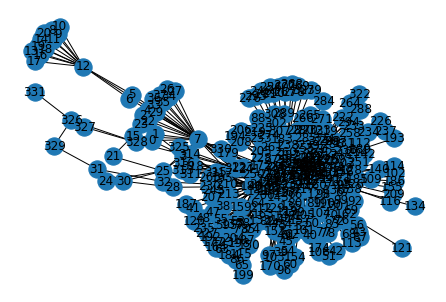

In [8]:
G = nx.from_numpy_matrix(np.array(adjacencyMatrix))
nx.draw(G, with_labels=True)

### Sparsness of the network

In [9]:
#Sparsness of the network

edgepossible = int((nodes*(nodes-1))/2)
edgespresent = len(u)

print('Total edges possible for ',nodes,' nodes are : ',edgepossible )
print('Number of edges present : ',edgespresent)

print('Density of the graph is : ',edgespresent/edgepossible)

Total edges possible for  332  nodes are :  54946
Number of edges present :  2126
Density of the graph is :  0.0386925344884068


### Average Degree

In [10]:
# Computing its Average Degree

nodeDegree = {}

for i in edgeList:
    nodeDegree[i] = len(edgeList[i])

print('Degree of each node is : ')
print(nodeDegree)

sumOfDegree = 0

for i in nodeDegree:
    sumOfDegree += nodeDegree[i]
    
print()
print('Average Degree of the given graph is : ',sumOfDegree/nodes)

Degree of each node is : 
{0: 3, 1: 3, 2: 2, 3: 5, 4: 2, 5: 3, 6: 3, 7: 29, 8: 4, 9: 4, 10: 3, 11: 3, 12: 14, 13: 1, 14: 1, 15: 2, 16: 3, 17: 1, 18: 3, 19: 3, 20: 1, 21: 2, 22: 2, 23: 2, 24: 1, 25: 8, 26: 1, 27: 2, 28: 4, 29: 2, 30: 3, 31: 3, 32: 4, 33: 2, 34: 3, 35: 3, 36: 2, 37: 3, 38: 3, 39: 7, 40: 3, 41: 1, 42: 1, 43: 1, 44: 19, 45: 8, 46: 57, 47: 3, 48: 4, 49: 10, 50: 4, 51: 1, 52: 5, 53: 7, 54: 8, 55: 6, 56: 4, 57: 8, 58: 10, 59: 8, 60: 6, 61: 10, 62: 9, 63: 3, 64: 41, 65: 4, 66: 78, 67: 6, 68: 4, 69: 3, 70: 9, 71: 7, 72: 6, 73: 5, 74: 9, 75: 6, 76: 4, 77: 3, 78: 3, 79: 10, 80: 5, 81: 11, 82: 15, 83: 2, 84: 5, 85: 3, 86: 3, 87: 1, 88: 1, 89: 9, 90: 18, 91: 20, 92: 4, 93: 34, 94: 22, 95: 7, 96: 3, 97: 2, 98: 9, 99: 7, 100: 14, 101: 4, 102: 2, 103: 3, 104: 3, 105: 6, 106: 2, 107: 4, 108: 50, 109: 2, 110: 7, 111: 70, 112: 2, 113: 1, 114: 2, 115: 6, 116: 1, 117: 139, 118: 29, 119: 8, 120: 1, 121: 1, 122: 26, 123: 2, 124: 15, 125: 8, 126: 4, 127: 9, 128: 5, 129: 9, 130: 45, 131: 4, 13

### ‘scaled degree distribution’

In [11]:
# Plot Scaled Degree Distribution

maxDegree = 0

for i in nodeDegree:
    if maxDegree < nodeDegree[i]:
        maxDegree = nodeDegree[i]

degreeDistribution = {}

for i in range(maxDegree+1):
    if i == 0:
        continue;
    degreeDistribution[i] = []
    
for i in nodeDegree:
    degreeDistribution[nodeDegree[i]].append(i)
    
print('Degree Distribution for each node is : ',degreeDistribution)

Degree Distribution for each node is :  {1: [13, 14, 17, 20, 24, 26, 41, 42, 43, 51, 87, 88, 113, 116, 120, 121, 134, 155, 164, 174, 177, 179, 184, 186, 187, 192, 193, 195, 199, 207, 209, 210, 226, 230, 237, 240, 243, 246, 256, 263, 264, 267, 276, 277, 278, 279, 281, 284, 288, 290, 293, 303, 322, 325, 331], 2: [2, 4, 15, 21, 22, 23, 27, 29, 33, 36, 83, 97, 102, 106, 109, 112, 114, 123, 133, 140, 154, 159, 194, 198, 204, 206, 208, 213, 222, 227, 233, 234, 235, 268, 269, 289, 294, 308, 327, 329, 330], 3: [0, 1, 5, 6, 10, 11, 16, 18, 19, 30, 31, 34, 35, 37, 38, 40, 47, 63, 69, 77, 78, 85, 86, 96, 103, 104, 137, 163, 170, 189, 214, 219, 225, 242, 301, 302, 311, 313, 314, 318, 328], 4: [8, 9, 28, 32, 48, 50, 56, 65, 68, 76, 92, 101, 107, 126, 131, 144, 153, 162, 172, 183, 185, 223, 251, 258, 316, 319, 326], 5: [3, 52, 73, 80, 84, 128, 135, 150, 190, 236, 271, 286, 307, 323], 6: [55, 60, 67, 72, 75, 105, 115, 139, 147, 157, 169, 205, 253, 274, 317], 7: [39, 53, 71, 95, 99, 110, 148, 167, 203

In [12]:
#Plotting the graphs for different distributions

def plotGraph(xValues,yValues,xLabel,yLabel,graphTitle,defaultSize='n'):
    if defaultSize=='n':
        f,ax=plt.subplots(figsize=(20,5))
        ax.legend(fontsize = 14)
        
    plt.bar(xValues,yValues,color='green')
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.title(graphTitle)
    plt.show()


In [14]:
max_degree = 0

for i in degreeDistribution:
    if max_degree < len(degreeDistribution[i]):
        max_degree = len(degreeDistribution[i])

No handles with labels found to put in legend.


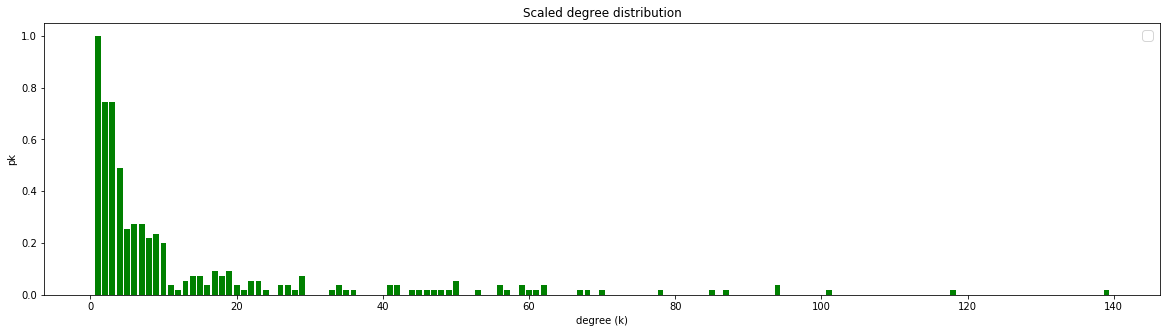

In [17]:
# Graph Plot

Xval = []
Yval = []

for i in degreeDistribution:
    Xval.append(i)
    Yval.append(len(degreeDistribution[i])/max_degree)
    
plotGraph(Xval,Yval,'degree (k)','pk','Scaled degree distribution') 

### Average Path Length , Diameter and Average Clustering Coefficient.

In [18]:
# Average Path Length = Average of the shortest path between all the pair of nodes
edgeListForBFS = []

for i in edgeList:
    edgeListForBFS.append(edgeList[i])

In [19]:
def BFS(adj, src, dest, v, pred, dist):
 
    # a queue to maintain queue of vertices whose
    # adjacency list is to be scanned as per normal
    # DFS algorithm
    queue = []
  
    # boolean array visited[] which stores the
    # information whether ith vertex is reached
    # at least once in the Breadth first search
    visited = [False for i in range(v)];
  
    # initially all vertices are unvisited
    # so v[i] for all i is false
    # and as no path is yet constructed
    # dist[i] for all i set to infinity
    for i in range(v):
 
        dist[i] = 1000000
        pred[i] = -1;
     
    # now source is first to be visited and
    # distance from source to itself should be 0
    visited[src] = True;
    dist[src] = 0;
    queue.append(src);
  
    # standard BFS algorithm
    while (len(queue) != 0):
        u = queue[0];
        queue.pop(0);
        for i in range(len(adj[u])):
         
            if (visited[adj[u][i]] == False):
                visited[adj[u][i]] = True;
                dist[adj[u][i]] = dist[u] + 1;
                pred[adj[u][i]] = u;
                queue.append(adj[u][i]);
  
                # We stop BFS when we find
                # destination.
                if (adj[u][i] == dest):
                    return True;
  
    return False;

In [21]:
def getShortestDistance(adj, s, dest, v):
     
    # predecessor[i] array stores predecessor of
    # i and distance array stores distance of i
    # from s
    pred=[0 for i in range(v)]
    dist=[0 for i in range(v)];
  
    if (BFS(adj, s, dest, v, pred, dist) == False):
        print("Given source and destination are not connected")
  
    # vector path stores the shortest path
    path = []
    crawl = dest;
    crawl = dest;
    path.append(crawl);
     
    while (pred[crawl] != -1):
        path.append(pred[crawl]);
        crawl = pred[crawl];
     
    return dist[dest]  

In [22]:
ShortestPathBetweenNodes = {}
for i in range(len(edgeList)):
    for j in range(i+1,len(edgeList)):
        ShortestPathBetweenNodes[(i,j)] = getShortestDistance(edgeListForBFS,i,j,nodes)

In [31]:
# ShortestPathBetweenNodes

In [24]:
#Average Path Length

ShortestPathSum = 0

for i in ShortestPathBetweenNodes:
    ShortestPathSum += ShortestPathBetweenNodes[i]

print('Average Shortest Path is ',ShortestPathSum/len(ShortestPathBetweenNodes))

Average Shortest Path is  2.742110435700506


In [26]:
#Diameter - It is the longest shortest path between 2 nodes

max_ = 0
for i in ShortestPathBetweenNodes:
    if max_ < ShortestPathBetweenNodes[i]:
        max_ = ShortestPathBetweenNodes[i]
        
print('Longest Shortest Path is : ',max_)
print('Diameter nodes are : ')

for i in ShortestPathBetweenNodes:
    if ShortestPathBetweenNodes[i] == max_:
        print(i)

Longest Shortest Path is :  6
Diameter nodes are : 
(8, 329)
(8, 331)
(9, 329)
(9, 331)
(10, 329)
(10, 331)
(11, 329)
(11, 331)
(13, 329)
(13, 331)
(14, 329)
(14, 331)
(16, 329)
(16, 331)
(17, 329)
(17, 331)
(18, 329)
(18, 331)
(19, 329)
(19, 331)
(20, 329)
(20, 331)
(21, 331)
(24, 331)
(39, 331)
(54, 331)
(60, 331)
(63, 331)
(65, 331)
(86, 331)
(88, 329)
(88, 331)
(96, 331)
(97, 331)
(102, 331)
(103, 331)
(109, 331)
(112, 331)
(114, 331)
(115, 331)
(116, 331)
(120, 331)
(121, 329)
(121, 331)
(134, 329)
(134, 331)
(140, 331)
(155, 331)
(169, 331)
(170, 329)
(170, 331)
(186, 331)
(187, 329)
(187, 331)
(189, 331)
(193, 329)
(193, 331)
(199, 329)
(199, 331)
(209, 331)
(226, 331)
(234, 331)
(237, 331)
(242, 331)
(251, 331)
(261, 331)
(284, 331)
(301, 331)
(319, 331)
(322, 329)
(322, 331)
(323, 331)
(324, 331)


In [27]:
#Clustering Coefficient

clusterCoef = {}

for k in edgeList:
    neighbours = edgeList[k]
    neighbLength = len(neighbours)
    denominator = (neighbLength*(neighbLength-1))/2
    
    numerator = 0
    for i in range(neighbLength):
        for j in range(i+1,neighbLength):
            if adjacencyMatrix[neighbours[i]][neighbours[j]] == 1:
                numerator += 1
                
    if denominator == 0.0:
        clusterCoef[k] = 0
    else:
        clusterCoef[k] = numerator/denominator

print('Clustering Coeffient of each nodes are : ',clusterCoef)
print('\n')


sumCC = 0
for i in clusterCoef:
    sumCC += clusterCoef[i]

print('Average Clustering Coefficent is ',sumCC/nodes)

Clustering Coeffient of each nodes are :  {0: 1.0, 1: 1.0, 2: 1.0, 3: 0.6, 4: 1.0, 5: 1.0, 6: 1.0, 7: 0.1206896551724138, 8: 0.8333333333333334, 9: 0.8333333333333334, 10: 1.0, 11: 1.0, 12: 0.12087912087912088, 13: 0, 14: 0, 15: 0.0, 16: 1.0, 17: 0, 18: 1.0, 19: 1.0, 20: 0, 21: 0.0, 22: 1.0, 23: 1.0, 24: 0, 25: 0.25, 26: 0, 27: 1.0, 28: 0.6666666666666666, 29: 1.0, 30: 0.3333333333333333, 31: 0.0, 32: 0.5, 33: 1.0, 34: 0.6666666666666666, 35: 0.6666666666666666, 36: 1.0, 37: 0.6666666666666666, 38: 1.0, 39: 0.9047619047619048, 40: 1.0, 41: 0, 42: 0, 43: 0, 44: 0.4444444444444444, 45: 0.8928571428571429, 46: 0.3201754385964912, 47: 0.6666666666666666, 48: 0.6666666666666666, 49: 0.7777777777777778, 50: 1.0, 51: 0, 52: 0.8, 53: 0.9047619047619048, 54: 0.8928571428571429, 55: 0.8, 56: 0.6666666666666666, 57: 0.8214285714285714, 58: 0.6444444444444445, 59: 0.6428571428571429, 60: 0.9333333333333333, 61: 0.7777777777777778, 62: 0.8055555555555556, 63: 1.0, 64: 0.3329268292682927, 65: 0.6666